In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("/content/FyntraCustomerData.csv")
df.head()

,Email,Address,Avatar,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [ ]:
print(df.shape)

(500, 8)


In [ ]:
print(df.columns)

Index(['Email', 'Address', 'Avatar', 'Avg_Session_Length', 'Time_on_App',
       'Time_on_Website', 'Length_of_Membership', 'Yearly_Amount_Spent'],
      dtype='object')


In [ ]:
correlation_app = df['Time_on_Website'].corr(df['Yearly_Amount_Spent'])
print(f"Correlation between Time on App and Yearly Amount Spent: {correlation_app}")

Correlation between Time on App and Yearly Amount Spent: -0.002640844717963287


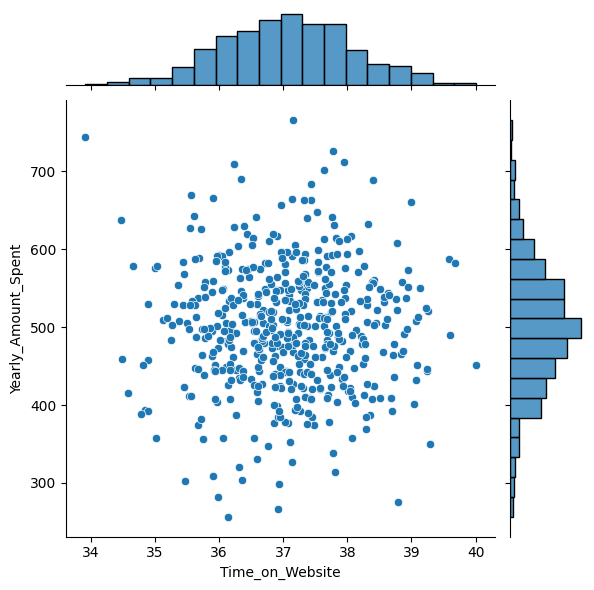

In [ ]:
sns.jointplot(x='Time_on_Website', y='Yearly_Amount_Spent', data=df, kind='scatter')
plt.show()

In [ ]:
correlation_app = df['Time_on_App'].corr(df['Yearly_Amount_Spent'])
print(f"Correlation between Time on App and Yearly Amount Spent: {correlation_app}")

Correlation between Time on App and Yearly Amount Spent: 0.4993277700598346


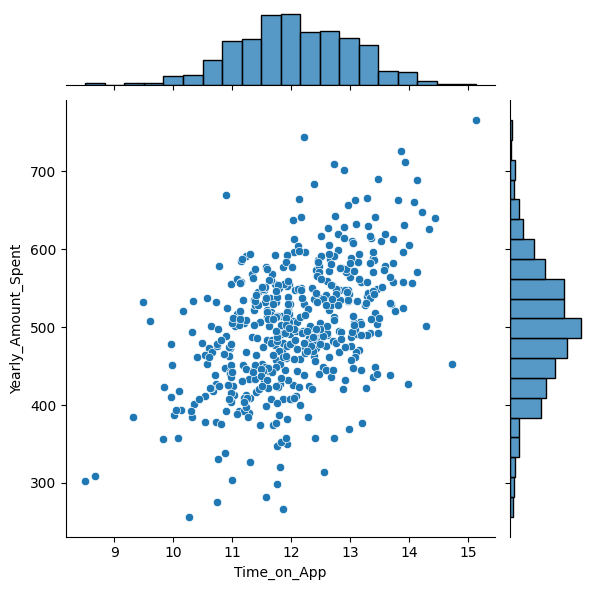

In [ ]:
sns.jointplot(x='Time_on_App', y='Yearly_Amount_Spent', data=df, kind='scatter')
plt.show()

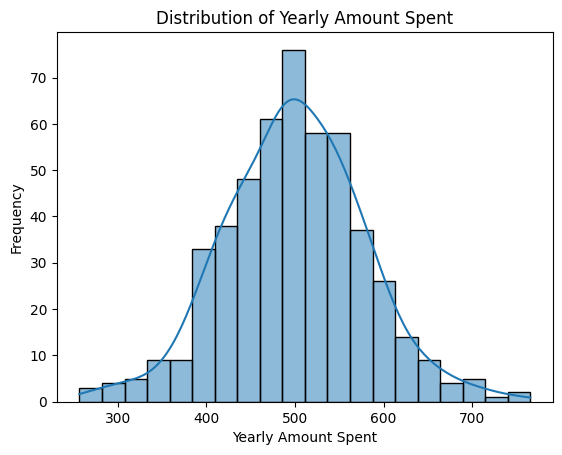

In [ ]:

sns.histplot(df['Yearly_Amount_Spent'], kde=True)
plt.title('Distribution of Yearly Amount Spent')
plt.xlabel('Yearly Amount Spent')
plt.ylabel('Frequency')
plt.show()


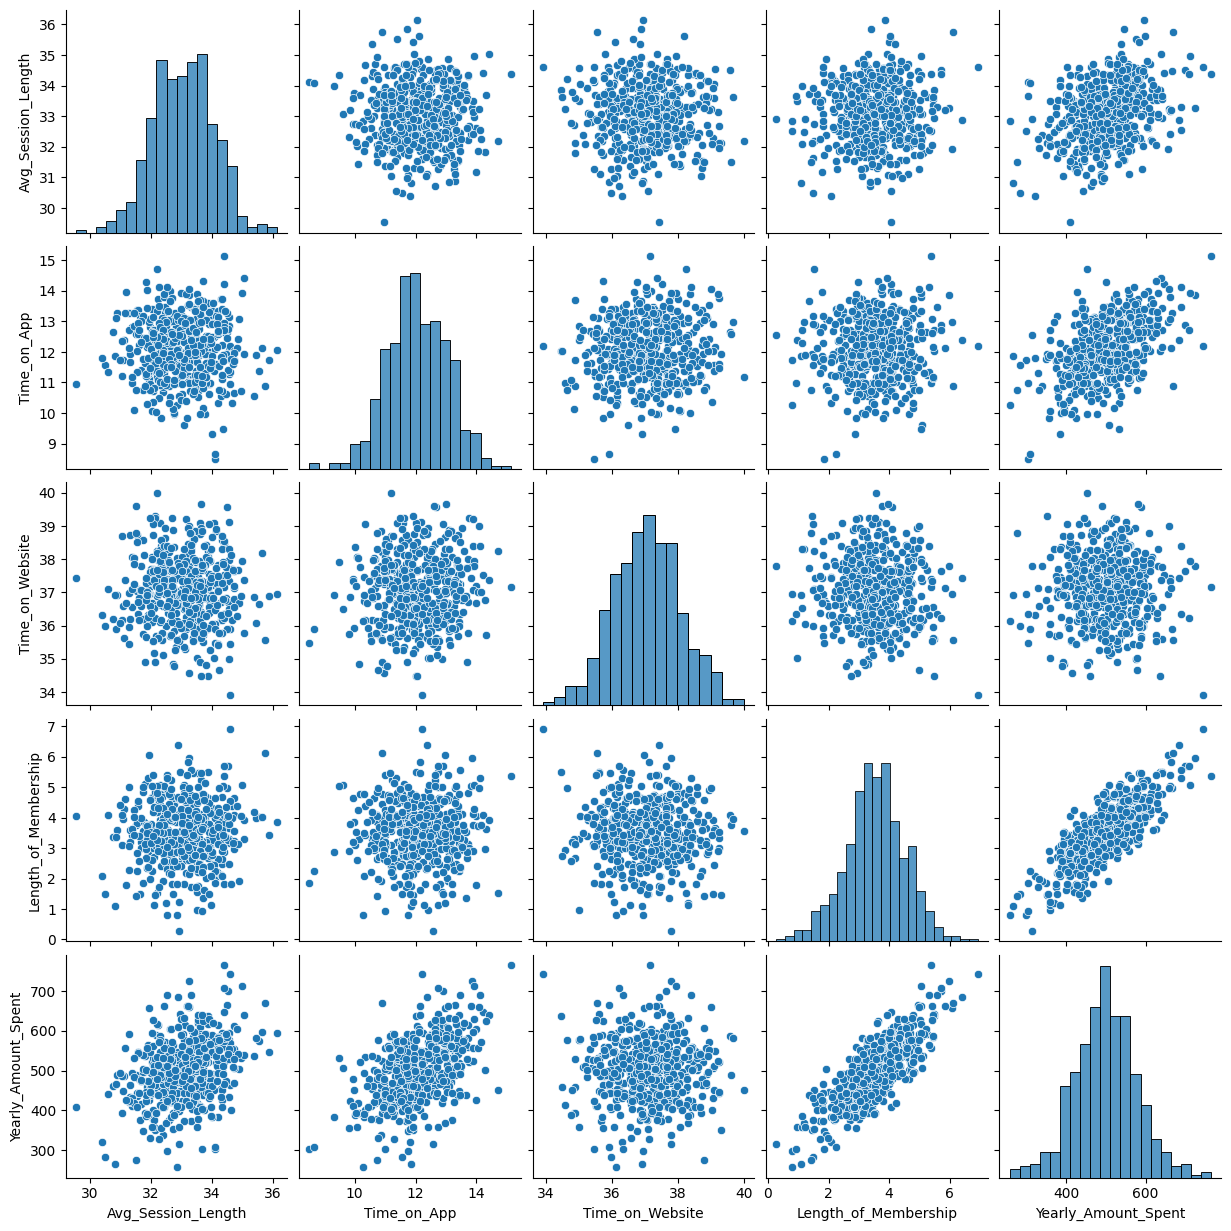

In [ ]:
sns.pairplot(df)
plt.show()

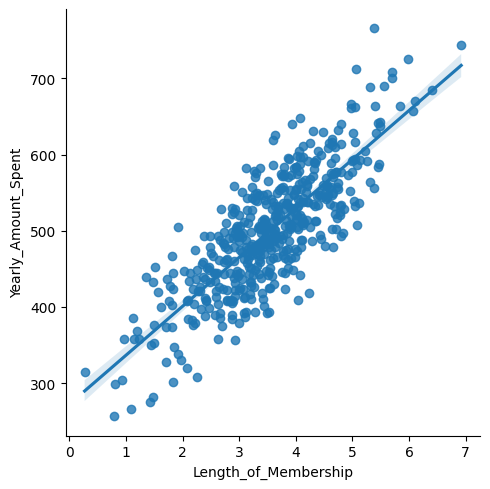

In [ ]:
sns.lmplot(x='Length_of_Membership', y='Yearly_Amount_Spent', data=df)
plt.show()


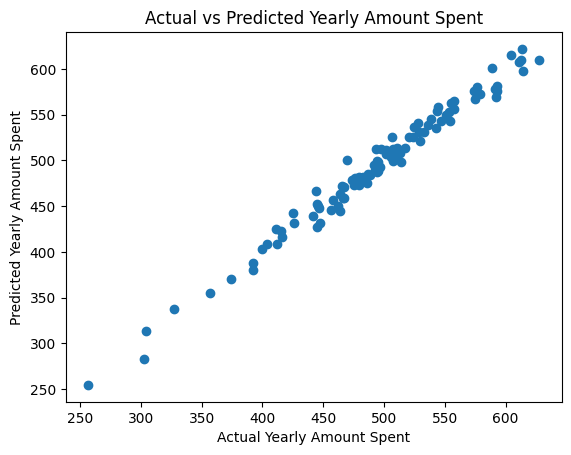

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df[['Time_on_Website', 'Time_on_App', 'Length_of_Membership', 'Avg_Session_Length']]
y = df['Yearly_Amount_Spent']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=85)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


plt.scatter(y_test, y_pred)
plt.xlabel('Actual Yearly Amount Spent')
plt.ylabel('Predicted Yearly Amount Spent')
plt.title('Actual vs Predicted Yearly Amount Spent')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')


Root Mean Squared Error: 10.572658672879337


In [ ]:

coefficients = model.coef_
print(coefficients)


[ 0.40460005 39.18778762 61.41777824 26.08163249]


In [ ]:
from sklearn.linear_model import LinearRegression


X = df[['Time_on_Website', 'Time_on_App']]
y = df['Yearly_Amount_Spent']


model = LinearRegression()
model.fit(X, y)


coefficients = model.coef_


coeff_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
print(coeff_df)


           Feature  Coefficient
0  Time_on_Website    -3.459811
1      Time_on_App    40.124205


Conclusion:
Based on the coefficients, Time on App has a higher positive impact than Time on Website, so Fyntra should focus more on improving the mobile app experience. However, Length of Membership has the highest coefficient, suggesting that increasing customer membership duration may be a key strategy for increasing spending.

If the Time on Website coefficient had been higher than Time on App, the company would focus more on optimizing the website experience.